In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
import os
import xrft
from dask.diagnostics import ProgressBar
from fastjmd95 import jmd95numba

In [18]:
RC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/RC.data', dtype='>f4')
DRF =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/DRF.data', dtype='>f4')
depth =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/Depth.data', dtype='>f4')
hFacC = np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/hFacC.data', dtype='>f4')

FileNotFoundError: [Errno 2] No such file or directory: '/swot/SUM01/spencer/swot_agulhas_test/Depth.data'

In [3]:
hFacC_re = hFacC.reshape(-1,2160,2160)
hFacC_re = xr.DataArray(hFacC_re,dims=['k','j','i'])

In [ ]:
indir = '/swot/SUM01/LLC/llc_4320_agulhas/'
Etatarget = '/swot/SUM02/spencer/swot_agulhas_surf/rho_deptha.zarr'
for i in range(0,1752):
    if np.mod(i,10)==0:
        print(i)
    nt = 10368 + i*144
    Nt = nt - 10368
    ds = xr.open_dataset(indir + 'llc_4320_agulhas.%010d.nc' %nt)
    theta = ds.Theta[0].assign_coords(depth=('k', RC))
    salt = ds.Salt[0].assign_coords(depth=('k', RC),depth_diff=('k', DRF))
    Density = jmd95numba.rho(salt, theta, -theta.depth).where(salt>1)
    rho_da = (Density*salt.depth_diff*hFacC_re).sum('k')/(salt.depth_diff*hFacC_re).sum('k')
    rho_da.expand_dims('time').to_dataset(name='rho').to_zarr(Etatarget, append_dim='time')

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
810
820
830
840
850
860
870
890
900
910
920
930
940
950
960
970


In [4]:
depth_re = depth.reshape(2160,2160)
depth_re = xr.DataArray(depth_re,dims=['j','i'])

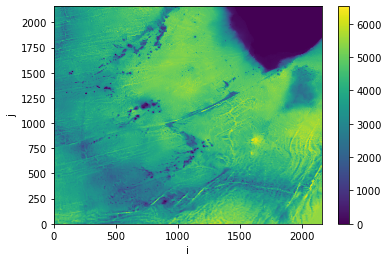

In [5]:
depth_re.plot()

In [108]:
mean_dens = rho_da.mean('time').load()
#mean_dens = rho_da.isel(time=slice(-168,2000)).mean('time').load()

/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [31]:
tRef = [18.89, 18.89, 18.89, 18.89, 18.89, 18.87,
         18.85, 18.82, 18.80, 18.73, 18.65, 18.57,
         18.40, 18.22, 18.00, 17.74, 17.44, 17.12,
         16.76, 16.39, 15.98, 15.55, 15.08, 14.59,
         14.07, 13.53, 12.99, 12.47, 11.97, 11.49,
         11.02, 10.57, 10.12,  9.71,  9.27,  8.88,
          8.46,  8.09,  7.71,  7.37,  7.03,  6.72,
          6.42,  6.13,  5.86,  5.59,  5.34,  5.09,
          4.87,  4.65,  4.45,  4.26,  4.08,  3.91,
          3.75,  3.60,  3.47,  3.33,  3.20,  3.08,
          2.96,  2.84,  2.73,  2.62,  2.51,  2.42,
          2.32,  2.23,  2.14,  2.06,  1.98,  1.90,
          1.81,  1.73,  1.65,  1.57,  1.49,  1.41,
          1.33,  1.24,  1.15,  1.06,  0.98,  0.94,
          0.91,  0.92,  0.98,  0.98,  0.98,  0.98]
sRef = [34.84, 34.84, 34.84, 34.84, 34.84, 34.84,
         34.85, 34.85, 34.85, 34.86, 34.87, 34.88,
         34.89, 34.90, 34.92, 34.94, 34.96, 34.98,
         35.00, 35.02, 35.04, 35.06, 35.07, 35.07,
         35.07, 35.05, 35.03, 35.01, 34.98, 34.95,
         34.92, 34.89, 34.85, 34.82, 34.79, 34.76,
         34.73, 34.71, 34.68, 34.66, 34.64, 34.62,
         34.61, 34.60, 34.59, 34.59, 34.58, 34.58,
         34.59, 34.59, 34.60, 34.60, 34.61, 34.62,
         34.63, 34.64, 34.65, 34.66, 34.67, 34.68,
         34.69, 34.70, 34.71, 34.71, 34.72, 34.72,
         34.73, 34.73, 34.74, 34.74, 34.74, 34.74,
         34.75, 34.74, 34.74, 34.74, 34.74, 34.74,
         34.74, 34.74, 34.73, 34.73, 34.73, 34.73,
         34.73, 34.72, 34.72, 34.72, 34.72, 34.72]
sample_profile = jmd95numba.rho(sRef, tRef, -RC)
sample_mean = np.sum(sample_profile*DRF)/np.sum(DRF)
sample_mean

1043.3426328445453

In [99]:
24*7

168

In [109]:
rho_da = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/rho_deptha.zarr')
rho_da = rho_da.rho.isel(time=slice(1,1520))
eta_mean = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_mean.zarr')
first_term = mean_dens/rho_da*eta_mean.Eta
#first_term.isel(time=10).plot(levels=np.arange(-1,1,0.1))
second_term = depth_re*(mean_dens-rho_da)/rho_da

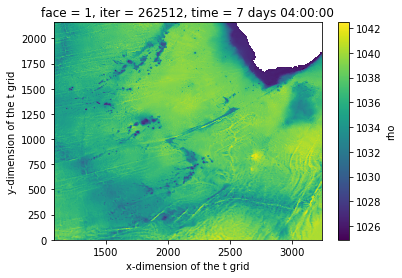

In [62]:
rho_da.isel(time=100).plot()

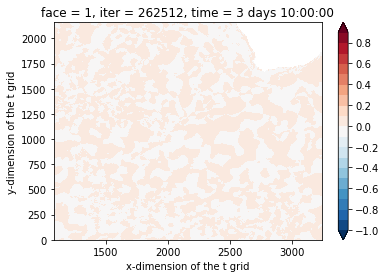

In [76]:
(eta_mean.Eta-first_term).isel(time=10).plot(levels=np.arange(-1,1,0.1))

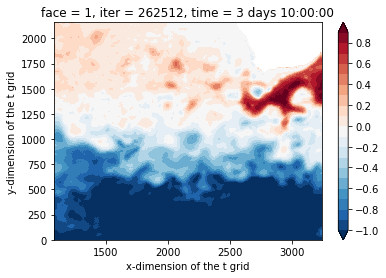

In [125]:
(first_term+second_term).isel(time=10).plot(levels=np.arange(-1,1,0.1))

In [127]:
(first_term+second_term).to_dataset(name='Eta').to_zarr('/swot/SUM02/spencer/swot_agulhas_surf/steric_height.zarr')

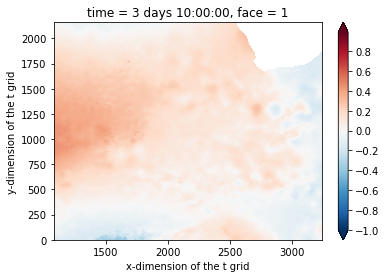

In [124]:
(eta_merged.Eta - (first_term+second_term)).isel(time=10).plot.pcolormesh(levels=np.arange(-1,1,0.01),rasterized=True,cbar_kwargs={'extend':'both'})

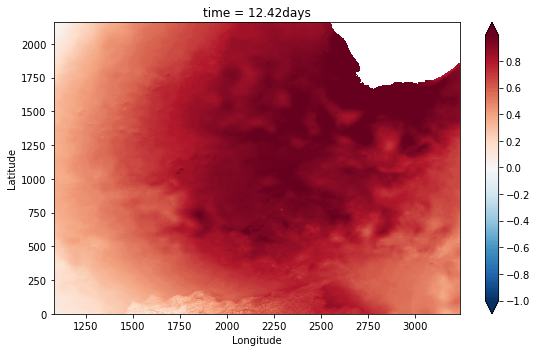

In [119]:
plt.figure(figsize=(8,5))
for tt in range(1,300):
    plt.clf()
    (eta_merged.Eta - (first_term+second_term)).isel(time=tt).plot.pcolormesh(levels=np.arange(-1,1,0.01),rasterized=True,cbar_kwargs={'extend':'both'})
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('time = ' + '{0:.2f}'.format((eta_merged.time.values[tt]-eta_merged.time.values[1]).item()/3600/24/10**9)+ 'days')
    plt.tight_layout()
    
    fig = plt.gcf()
    fig.savefig("/home/spencerj/agulhas-offline/movie/eta/fig{:03d}.jpg".format(tt))

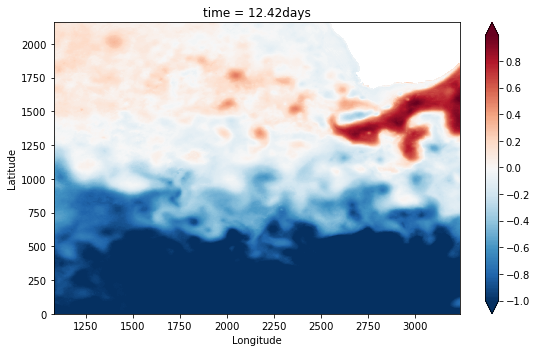

In [120]:
plt.figure(figsize=(8,5))
for tt in range(1,300):
    plt.clf()
    (first_term+second_term).isel(time=tt).plot.pcolormesh(levels=np.arange(-1,1,0.01),rasterized=True,cbar_kwargs={'extend':'both'})
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('time = ' + '{0:.2f}'.format((eta_merged.time.values[tt]-eta_merged.time.values[1]).item()/3600/24/10**9)+ 'days')
    plt.tight_layout()
    
    fig = plt.gcf()
    fig.savefig("/home/spencerj/agulhas-offline/movie/eta_steric/fig{:03d}.jpg".format(tt))

In [122]:
filtered_ps = xrft.power_spectrum((first_term+second_term).isel(time=slice(0,500)).drop_vars('time').chunk({'time':-1}),dim=['time'],window=True)
unfiltered_ps = xrft.power_spectrum(eta_merged.Eta.isel(time=slice(0,500)).drop_vars('time').chunk({'time':-1}),dim=['time'],window=True)

/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/xrft/xrft.py:51: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  FutureWarning,
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/xrft/xrft.py:51: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  FutureWarning,


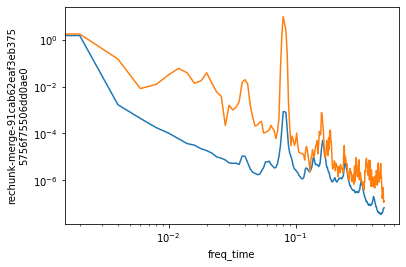

In [123]:
filtered_ps[920:-920,850:-850,250:].mean(['i','j']).plot()
unfiltered_ps[250:,920:-920,850:-850].mean(['i','j']).plot()
plt.xscale('log')
plt.yscale('log')

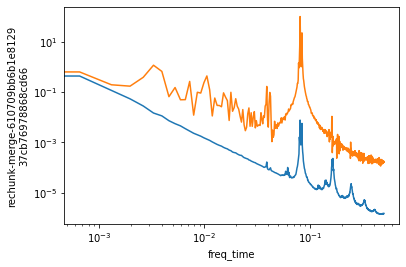

In [96]:
filtered_ps[920:-920,850:-850,759:].mean(['i','j']).plot()
unfiltered_ps[759:,920:-920,850:-850].mean(['i','j']).plot()
plt.xscale('log')
plt.yscale('log')

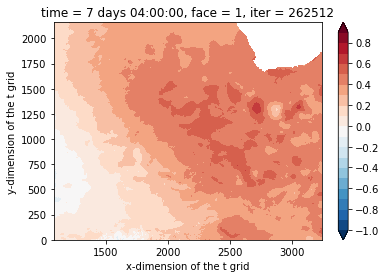

In [75]:
eta_merged = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_long.zarr')#,decode_cf=False)

eta_merged = eta_merged.isel(time=slice(1,1800))

(eta_merged.Eta-first_term-second_term).isel(time=100).plot(levels=np.arange(-1,1,0.1))

In [43]:
baro_filtered = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/baro_nom.zarr')

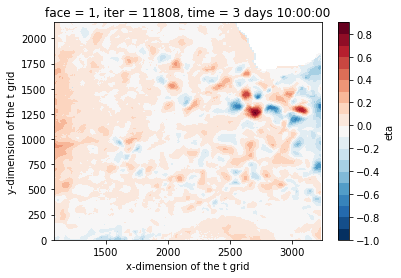

In [44]:
baro_filtered.isel(time=slice(1,2100)).eta.isel(time=10).plot(levels=np.arange(-1,1,0.1))

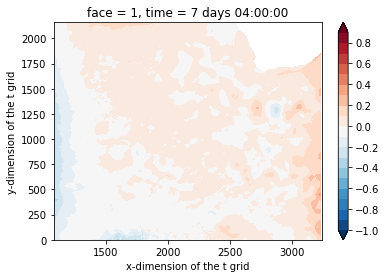

In [78]:
(baro_filtered.isel(time=slice(1,2100)).eta.isel(time=100)-(second_term-first_term+eta_mean.Eta).isel(time=100)).plot(levels=np.arange(-1,1,0.1))

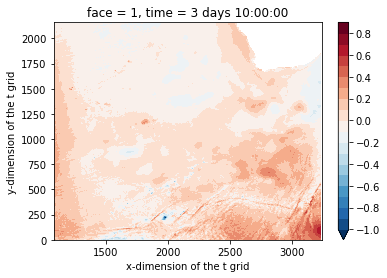

In [54]:
(baro_filtered.isel(time=slice(1,2100)).eta.isel(time=10)-(second_term+first_term).isel(time=10)).plot(levels=np.arange(-1,1,0.1))

In [3]:
indir = '/swot/SUM01/LLC/llc_4320_agulhas/'
Etatarget = '/swot/SUM02/spencer/swot_agulhas_surf/steric.zarr'
for i in range(0,1751):
    if np.mod(i,10)==0:
        print(i)
    nt = 10368 + i*144
    Nt = nt - 10368
    ds = xr.open_dataset(indir + 'llc_4320_agulhas.%010d.nc' %nt)
    theta = ds.Theta[0].assign_coords(depth=('k', RC))
    salt = ds.Salt[0].assign_coords(depth=('k', RC),depth_diff=('k', DRF))
    Density = jmd95numba.rho(salt, theta, -theta.depth).where(salt>1)
    rho_ref=1035
    steric_height = (((Density-rho_ref)/rho_ref)*salt.depth_diff).sum('k')
    steric_height_slice = steric_height
    steric_height_slice.expand_dims('time').to_dataset(name='sh').to_zarr(Etatarget, append_dim='time')

0
10
20
30
40


KeyboardInterrupt: 

In [6]:
steric_height_slice

<xarray.DataArray (j: 2160, i: 2160)>
array([[15.92128082, 15.92034808, 15.91901451, ..., 31.72075535,
        31.72223187, 31.72384493],
       [15.91970579, 15.91878899, 15.91728165, ..., 31.7134722 ,
        31.71506532, 31.71680767],
       [15.91812815, 15.91703429, 20.25455358, ..., 31.70619088,
        31.70777475, 31.70951802],
       ...,
       [ 1.35693316,  1.35678304,  1.3571558 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.35542032,  1.35538274,  1.35612107, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.35294449,  1.35328966,  1.35439204, ...,  0.        ,
         0.        ,  0.        ]])
Coordinates:
    face     int64 1
  * i        (i) int64 1080 1081 1082 1083 1084 ... 3235 3236 3237 3238 3239
    iter     int64 10368
  * j        (j) float64 0.0 1.0 2.0 3.0 ... 2.157e+03 2.158e+03 2.159e+03
    time     timedelta64[ns] 3 days

In [67]:
Density = jmd95numba.rho(Salt.Salt, Temp.Theta, -Temp.depth).where(Salt.Salt>1)

In [68]:

rho_ref=1035
steric_height = (((Density-rho_ref)/rho_ref)*Salt.depth_diff).sum('k')

In [69]:
Etatarget = '/swot/SUM02/spencer/swot_agulhas_surf/steric.zarr'
for i in range(0,169):
    if np.mod(i,10)==0:
        print(i)
    nt = 10368 + i*144
    Nt = nt - 10368
    steric_height_slice = steric_height.isel(time=[i])
    steric_height_slice.to_dataset(name='sh').to_zarr(Etatarget, append_dim='time')

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160


IndexError: Index out of bounds 168

In [3]:
steric_withmean = xr.open_zarr('/swot/SUM02/spencer/steric_inc_mean.zarr')

In [75]:
steric_mean = steric_withmean.sh.isel(time=slice(1,169)).mean('time').load()
steric_nomean = steric_withmean.sh-steric_mean

In [79]:
Etatarget = '/swot/SUM02/spencer/swot_agulhas_surf/steric_nom.zarr'
for i in range(0,169):
    if np.mod(i,10)==0:
        print(i)
    nt = 10368 + i*144
    Nt = nt - 10368
    steric_nomean_slice = steric_nomean.isel(time=[i])
    steric_nomean_slice.to_dataset(name='sh').to_zarr(Etatarget, append_dim='time')

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160


In [81]:
steric_nomean = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/steric_nom.zarr')
baro_filtered = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/baro_nom.zarr')

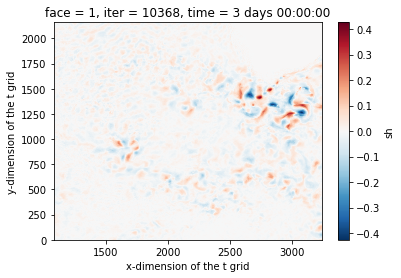

In [88]:
steric_nomean.sh.isel(time=2).plot()

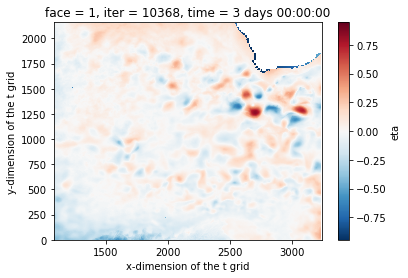

In [90]:
baro_filtered.eta.isel(time=1).plot()

In [4]:
steric_withmean = xr.open_zarr('/swot/SUM02/spencer/steric_inc_mean.zarr')

In [5]:
steric_compare = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/steric_height.zarr')

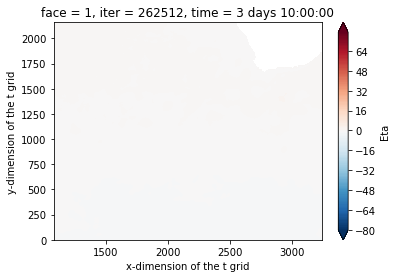

In [17]:
steric_compare.isel(time=10).Eta.plot(levels=np.arange(-80,80,1))

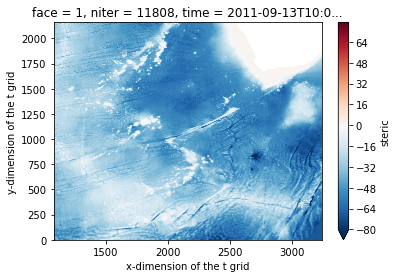

In [16]:
steric_withmean.isel(time=10).steric.plot(levels=np.arange(-80,80,1))